# Value at Risk

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr


### 1. Calculate static VaR

In [8]:
# for short time horizons er will be small, and therefore VaR estimations
# will not be much influenced by it
from scipy.stats import norm
CL = 0.95
TRADING_DAYS = 252
portfolio_val = 950000
volatility = 0.307
t = 21
cutoff = norm.ppf(CL)
VaR = portfolio_val * volatility * np.sqrt(t/TRADING_DAYS) * cutoff
print("At {:.2f} confidence level, loss will not exceed {:,.2f}".format(CL, VaR))
print("This represents a move of {:.2f} standard deviations below the expected return".format(cutoff))

At 0.95 confidence level, loss will not exceed 138,483.69
This represents a move of 1.64 standard deviations below the expected return


### 2. Parameters of 1-stock portfolio to use in MC simulation

In [9]:
aapl = 4000
aapl_price = pdr.get_quote_yahoo('AAPL')['price']
aapl_value = aapl * aapl_price
aapl_value = aapl_value.at['AAPL']
t = 21/252
rfr = .02
volatility = .307
iterations = 50000

In [11]:
aapl_price

AAPL    937920.0
Name: price, dtype: float64

### 3. Define VaR function

In [12]:
def VaR(pv, rfr, vol, T, iterations):
    end = pv * np.exp((rfr - .5 * vol ** 2) * T + 
                     vol * np.sqrt(T) * np.random.standard_normal(iterations))
    ending_values = end - pv
    return ending_values

### 4. Run simulation

In [16]:
at_risk = VaR(aapl_value, rfr,volatility, t, iterations )

### 5. Visualize Portfolio ending value distribution

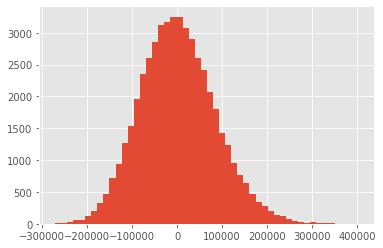

In [17]:
with plt.style.context('ggplot'):
    plt.hist(at_risk, bins=50)

### 6. Numerical 

In [18]:
percentiles = [1,5,10]
print("Portfolio value: ${:,.0f}".format(aapl * aapl_price[0]))
print("-" * 35)
for value in percentiles:
    print("VaR {:.0%} confidence level: ${:,.0f}".format((100-value)/100, 
                                                         np.percentile(at_risk, value)))

Portfolio value: $937,920
-----------------------------------
VaR 99% confidence level: $-176,535
VaR 95% confidence level: $-129,026
VaR 90% confidence level: $-102,555
